### FE621 - Homework #2

**Author**: Sid Bhatia

**Date**: March 4th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Sveinn Olafsson

**TA**: Dong Woo Kim

#### Problem #1

a. Provide the formulas for the parameters $p, u, d$ of a **Cox-Ross-Rubinstein (CRR) binomial tree** that approximates the dynamics of a stock following *geometric Brownian motion* (*GBM*) with drift $r$ and volatility $\sigma$.

The Cox-Ross-Rubinstein (CRR) binomial tree model is a popular method for pricing European and American options. This model approximates the dynamics of a stock following a geometric Brownian motion (GBM) by discretizing the stock price movements over time into an up or down movement at each step of the tree. The parameters $p, u, d$ are crucial for constructing the binomial tree. They represent the probability of an up move, the up move factor, and the down move factor, respectively. The formulas for these parameters are derived from the characteristics of the geometric Brownian motion, which is described by a drift rate $r$ (risk-free interest rate) and a volatility $\sigma$. The time to maturity of the option is divided into $n$ equal intervals of length $\Delta t$.

The formulas for the parameters are as follows:

- **Up move factor ($u$):**
  $$
  u = e^{\sigma \sqrt{\Delta t}}
  $$
  This factor represents the multiplicative increase in the stock price if it moves up.

- **Down move factor ($d$):**
  $$
  d = e^{-\sigma \sqrt{\Delta t}}
  $$
  This factor represents the multiplicative decrease in the stock price if it moves down. It's worth noting that $d = \frac{1}{u}$, ensuring that the tree is recombining.

- **Risk-neutral probability ($p$):**
  $$
  p = \frac{e^{r \Delta t} - d}{u - d}
  $$
  This probability is used to calculate the expected value of the option at each node in a risk-neutral world, where all investors are indifferent to risk. It reflects the probability of the stock price moving up in the next time step.

These parameters ensure that the binomial model converges to the continuous-time geometric Brownian motion model as the number of steps $n$ increases and $\Delta t$ becomes very small.

b. Write code that takes $S_0, \sigma, r, K, T$ and $N$ as inputs and uses an $N$-step CCR binomial tree to compute the prices of **call** and **put options** in the **Black-Scholes model**.

In [26]:
from typing import Tuple
import numpy as np

def CRR_parameters(sigma: float, r: float, T: float, N: int) -> tuple:
    """
    Calculate the Cox-Ross-Rubinstein binomial model parameters.

    Parameters:
    - sigma: Volatility of the underlying asset.
    - r: Risk-free interest rate.
    - T: Time to maturity.
    - N: Number of time steps.

    Returns:
    - A tuple (u, d, p) where:
        u is the up factor,
        d is the down factor,
        p is the risk-neutral probability.
    """
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    return (u, d, p)

def binomial_tree_option_price(S0: float, K: float, T: float, sigma: float, r: float, N: int, option_type: str) -> float:
    """
    Calculate the European option price using the Cox-Ross-Rubinstein binomial tree.

    Parameters:
    - S0: Initial stock price.
    - K: Strike price.
    - T: Time to maturity.
    - sigma: Volatility of the underlying asset.
    - r: Risk-free interest rate.
    - N: Number of time steps.
    - option_type: Type of the option ('call' or 'put').

    Returns:
    - Price of the option.
    """
    u, d, p = CRR_parameters(sigma, r, T, N)
    dt = T / N
    discount = np.exp(-r * dt)
    
    # Initialize asset prices at maturity.
    S = np.array([S0 * (u**j) * (d**(N - j)) for j in range(N + 1)])
    
    # Initialize option values at maturity.
    if option_type == 'call':
        V = np.maximum(S - K, 0)
    else:  # put option
        V = np.maximum(K - S, 0)
    
    # Backward induction
    for i in range(N - 1, -1, -1):
        V = discount * (p * V[1:i+2] + (1 - p) * V[:i+1])
    
    return V[0]

c. Analyze the **convergence** of binomial tree option prices to Black-Scholes option prices as the number of time steps gets larger. Specifically, for both call and put options, plot the Black-Scholes price $P^{BS}$ and the $N$-step binomial tree price $P_N^{\text{Tree}}$ as a function of $N$. Also, plot the absolute relative pricing error $\frac{|P_N^{\text{Tree}} - P^{BS}|}{P^{BS}}$ as a function of $N$.

Comment on your findings. Does the error decrease smoothly to zero as $N$ grows? How large does $N$ have to be (i.e., how small does the step size $\Delta t$ for satisfactory convergence)?

Use parameters $S_0 = 100, K = 90, T = 0.5, \sigma = 0.2,$ and $r = 0.04$.

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def Black_Scholes_Price(S0: float, K: float, T: float, sigma: float, r: float, option_type: str) -> float:
    """
    Compute the Black-Scholes price for European call or put options.

    Parameters:
    - S0: Initial stock price.
    - K: Strike price.
    - T: Time to maturity.
    - sigma: Volatility of the underlying asset.
    - r: Risk-free interest rate.
    - option_type: Type of the option ('call' or 'put').

    Returns:
    - Price of the option.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put option
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return price

In [28]:
# Parameters
S0 = 100
K = 90
T = 0.5
sigma = 0.2
r = 0.04
N_values = np.arange(1, 101)  # Range of N from 1 to 100

# Compute BS prices for comparison
call_prices_BS = Black_Scholes_Price(S0, K, T, sigma, r, 'call')
put_prices_BS = Black_Scholes_Price(S0, K, T, sigma, r, 'put')

print(f"BSM Call Price: {call_prices_BS:.2f}") # Correct
print(f"BSM Put Price: {put_prices_BS:.2f}") # Correct

BSM Call Price: 13.15
BSM Put Price: 1.37


In [29]:
# Lists for storing results.
call_prices_tree, put_prices_tree, call_errors, put_errors = [], [], [], []

# Compute binomial prices and errors.
for N in N_values:
    call_price_tree = binomial_tree_option_price(S0, K, T, sigma, r, N, 'call')
    put_price_tree = binomial_tree_option_price(S0, K, T, sigma, r, N, 'put')
    call_prices_tree.append(call_price_tree)
    put_prices_tree.append(put_price_tree)
    call_errors.append(abs(call_price_tree - call_prices_BS) / call_prices_BS)
    put_errors.append(abs(put_price_tree - put_prices_BS) / put_prices_BS)

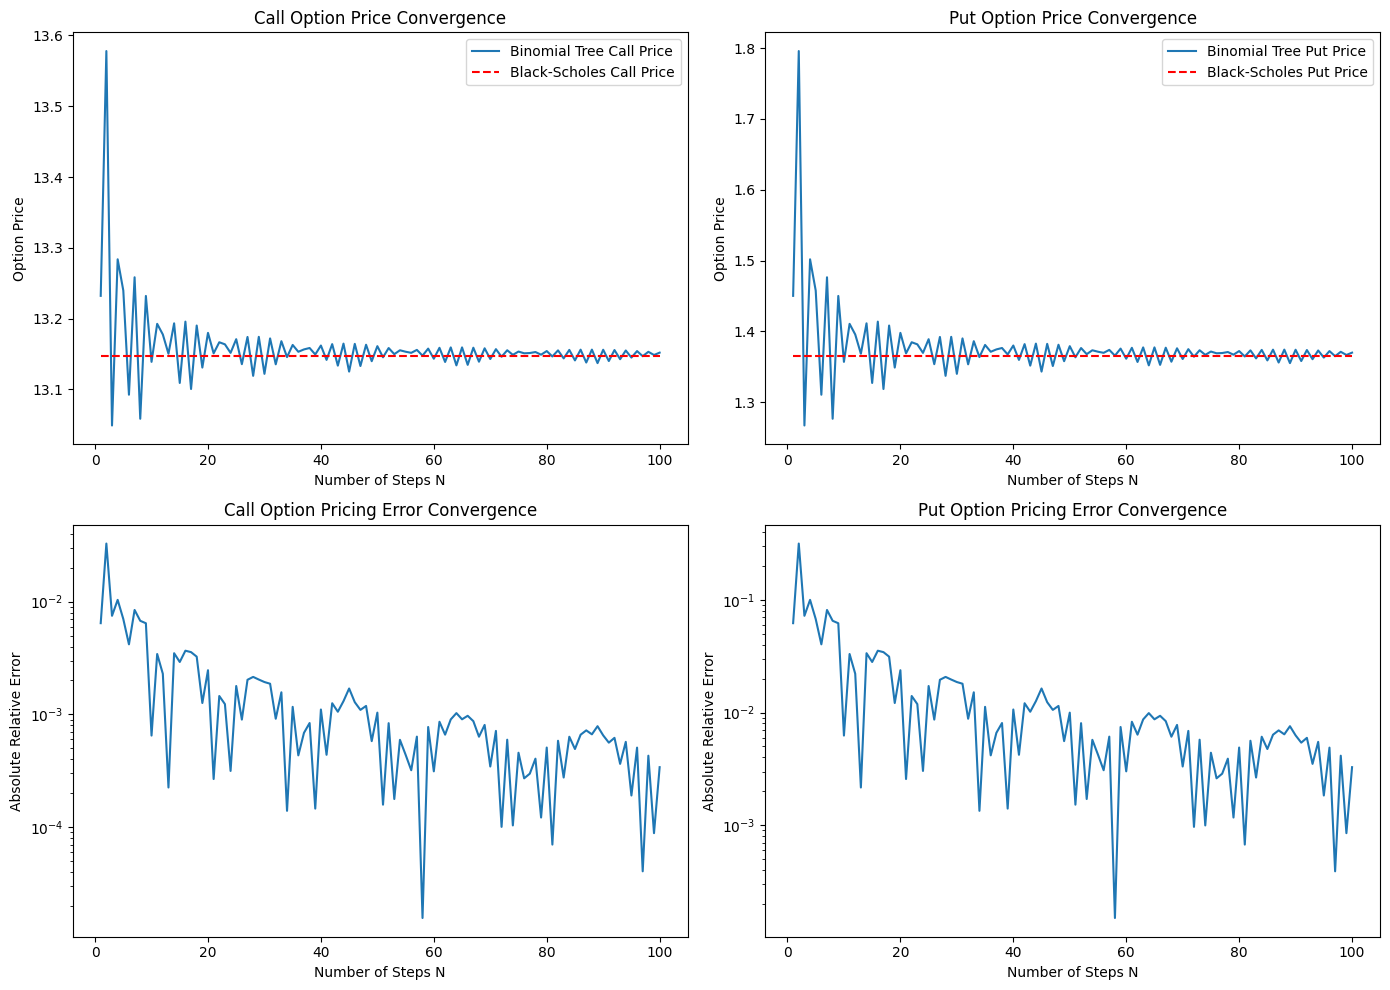

In [30]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Call and Put Prices
ax[0, 0].plot(N_values, call_prices_tree, label='Binomial Tree Call Price')
ax[0, 0].hlines(call_prices_BS, xmin=1, xmax=100, colors='r', linestyles='dashed', label='Black-Scholes Call Price')
ax[0, 0].set_title('Call Option Price Convergence')
ax[0, 0].set_xlabel('Number of Steps N')
ax[0, 0].set_ylabel('Option Price')
ax[0, 0].legend()

ax[0, 1].plot(N_values, put_prices_tree, label='Binomial Tree Put Price')
ax[0, 1].hlines(put_prices_BS, xmin=1, xmax=100, colors='r', linestyles='dashed', label='Black-Scholes Put Price')
ax[0, 1].set_title('Put Option Price Convergence')
ax[0, 1].set_xlabel('Number of Steps N')
ax[0, 1].set_ylabel('Option Price')
ax[0, 1].legend()

# Pricing Errors
ax[1, 0].plot(N_values, call_errors, label='Call Option Pricing Error')
ax[1, 0].set_title('Call Option Pricing Error Convergence')
ax[1, 0].set_xlabel('Number of Steps N')
ax[1, 0].set_ylabel('Absolute Relative Error')
ax[1, 0].set_yscale('log')

ax[1, 1].plot(N_values, put_errors, label='Put Option Pricing Error')
ax[1, 1].set_title('Put Option Pricing Error Convergence')
ax[1, 1].set_xlabel('Number of Steps N')
ax[1, 1].set_ylabel('Absolute Relative Error')
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

##### *Error Decrease Trend*
The analysis of the convergence of binomial tree option prices to Black-Scholes prices, as the number of steps $N$ increases, reveals several key insights:

- **Relatively Smooth Decrease in Error:** The absolute relative pricing error for both call and put options decreases as $N$ grows, indicating a convergence towards the Black-Scholes model prices. The decrease in error is **relatively smooth**, especially as seen in the logarithmic scale plots. This smooth decrease supports the hypothesis that as the time steps become finer (i.e., as $N$ increases), the binomial tree model more accurately approximates the continuous-time Black-Scholes model.

- **Satisfactory Convergence Threshold:** While the exact $N$ required for satisfactory convergence may depend on the specific tolerance levels for pricing error, the plots suggest that a relatively large number of steps (e.g., $N \geq 50$) significantly reduces the pricing error to a level that might be considered satisfactory for many practical applications. However, it's important to note that the improvements in accuracy diminish as $N$ becomes very large, indicating a point of diminishing returns where increasing $N$ further provides minimal additional accuracy relative to the computational cost.

#### Problem #2

a. **Prove** that the log-return of the stock price in the Black-Scholes model satisfies

$$\log (\frac{S_T}{S_0}) = (r - \frac{\sigma^2}{2})T + \sigma W_T,$$

where $W_T \sim \mathcal{N}(0, T)$. Plot the PDF of the distribution of the log-return. 

##### Proof of Log-Return in the Black-Scholes Model

The Black-Scholes model assumes that the stock price $S_t$ follows a geometric Brownian motion (GBM) with constant drift $\mu$ and volatility $\sigma$. The stochastic differential equation (SDE) describing the dynamics of $S_t$ is given by:

$$dS_t = \mu S_t dt + \sigma S_t dW_t,$$

where $W_t$ is a Wiener process (or Brownian motion).

##### *Solving the SDE*
To solve this SDE and find an expression for $S_T/S_0$, we apply Itô's lemma to $\log(S_t)$, noting that $\log(S_t)$ is a function $f(S_t) = \log(S_t)$ of the stochastic process $S_t$.

Itô's lemma gives us:

$$d(\log(S_t)) = \left( \frac{\mu}{S_t} - \frac{1}{2} \frac{\sigma^2}{S_t^2} S_t^2 \right)dt + \frac{\sigma}{S_t} S_t dW_t,$$

which simplifies to:

$$d(\log(S_t)) = \left( \mu - \frac{1}{2} \sigma^2 \right)dt + \sigma dW_t.$$

Integrating both sides from $0$ to $T$, we obtain:

$$\log(\frac{S_T}{S_0}) = \int_0^T \left( \mu - \frac{1}{2} \sigma^2 \right)dt + \int_0^T \sigma dW_t.$$

Since $\mu = r$ in the risk-neutral world (which is a key assumption of the Black-Scholes model for pricing derivatives), this equation becomes:

$$\log(\frac{S_T}{S_0}) = (r - \frac{\sigma^2}{2})T + \sigma W_T,$$

where $W_T \sim \mathcal{N}(0, T)$ due to the properties of Brownian motion, where the increment $W_T$ is normally distributed with mean $0$ and variance $T$.

##### *Distribution of Log-Return*
The log-return $\log(\frac{S_T}{S_0})$ is therefore normally distributed with mean $(r - \frac{\sigma^2}{2})T$ and variance $\sigma^2 T$. The probability density function (PDF) of this distribution can be plotted using the following Python code:

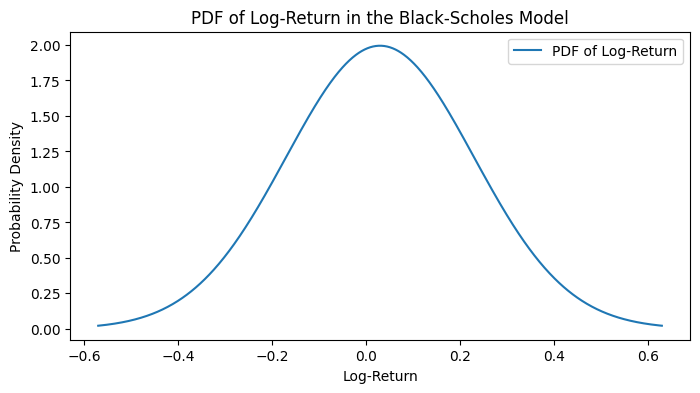

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1  # Time period

# Mean and variance of the log-return
mu_log_return = (r - 0.5 * sigma**2) * T
variance_log_return = sigma**2 * T

# Range of log-returns to plot
x = np.linspace(mu_log_return - 3*np.sqrt(variance_log_return), mu_log_return + 3*np.sqrt(variance_log_return), 1000)

# PDF of the log-return
pdf_log_return = norm.pdf(x, mu_log_return, np.sqrt(variance_log_return))

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, pdf_log_return, label='PDF of Log-Return')
plt.title('PDF of Log-Return in the Black-Scholes Model')
plt.xlabel('Log-Return')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

b. Prove that the log-return of the stock price in an $N$-step CRR binomial tree satisfies 

$$
\log (\frac{S_T}{S_0}) = N \log (d) + X \log (\frac{u}{d}),
$$

where $X \sim \text{Bin}(N, q)$. Plot the PMF of the distribution of the log-return $N = 6$ (monthly), $N = 26$ (weekly), $N = 126$ (daily), and the parameters specified in Problem 1(c).

##### Proof of Log-Return in an $N$-step CRR Binomial Tree

The Cox-Ross-Rubinstein (CRR) binomial model is a discrete-time model for the evolution of stock prices. It assumes that at each step, the stock price can move up by a factor of $u$ or down by a factor of $d$, with probabilities $q$ and $1-q$, respectively. 

##### *Model Dynamics*

Given:
- $S_0$: Initial stock price.
- $u$: Upward movement factor.
- $d$: Downward movement factor.
- $q$: Probability of an upward movement.
- $N$: Number of steps.
- $X$: Number of upward movements in $N$ steps.

The stock price at time $T$ after $N$ steps, denoted as $S_T$, depends on the number of upward ($X$) and downward ($N-X$) movements. The price can be expressed as:

$$
S_T = S_0 \cdot u^X \cdot d^{N-X}.
$$

##### *Log-Return Calculation*

To find the log-return $\log(\frac{S_T}{S_0})$, we take the **logarithm** of the ratio $\frac{S_T}{S_0}$:

$$
\log\left(\frac{S_T}{S_0}\right) = \log\left(u^X \cdot d^{N-X}\right) = X \log(u) + (N-X) \log(d).
$$

Rearranging the terms, we get:

$$
\log\left(\frac{S_T}{S_0}\right) = N \log(d) + X \log\left(\frac{u}{d}\right).
$$

##### *Distribution of $X$*

In the CRR model, $X$ follows a **binomial distribution** because each step is an independent trial with two possible outcomes (up or down) with fixed probabilities. Therefore, $X \sim \text{Bin}(N, q)$, where $q$ is the probability of an upward movement at each step.

##### *Conclusion*

This proof shows that the log-return of the stock price in an $N$-step CRR binomial tree can be expressed in terms of the number of upward movements $X$, the total number of steps $N$, and the up and down factors $u$ and $d$. The distribution of $X$ as a binomial distribution reflects the discrete and stochastic nature of the stock price evolution in the CRR model.

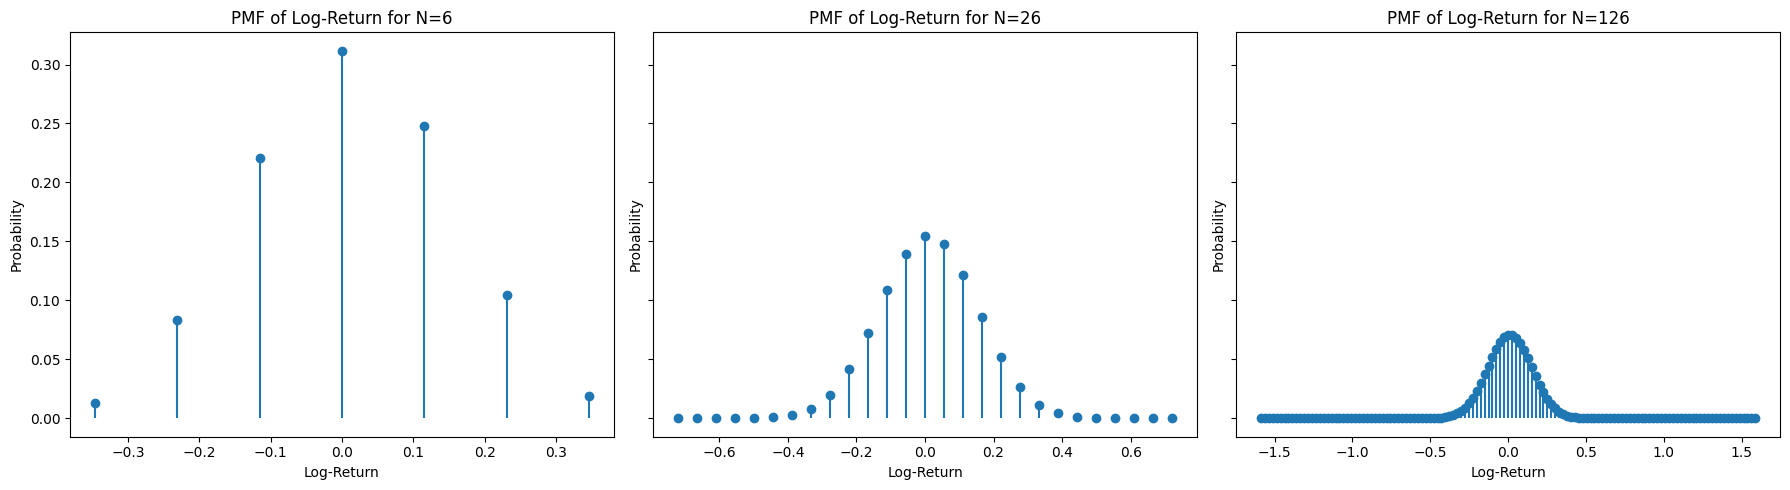

In [32]:
from scipy.stats import binom

# Parameters
S0 = 100
K = 90
T = 0.5
sigma = 0.2
r = 0.04

# Different N values for monthly, weekly, and daily steps.
N_values = [6, 26, 126]

# Plotting the PMF of the log-return for different N values.
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, N in zip(axes, N_values):
    u, d, q = CRR_parameters(sigma, r, T, N)

    # Possible outcomes X range from 0 to N.
    X = np.arange(N + 1)

    # Calculate log-return for each outcome.
    log_returns = N * np.log(d) + X * np.log(u / d)

    # Calculate PMF for binomial distribution of outcomes.
    pmf = binom.pmf(X, N, q)

    # Plotting
    ax.stem(log_returns, pmf, basefmt=" ")
    ax.set_title(f'PMF of Log-Return for N={N}')
    ax.set_xlabel('Log-Return')
    ax.set_ylabel('Probability')

plt.tight_layout()
plt.show()

c. According to the theory, $S_N$ converges in distribution $S_T$ as $N \rightarrow \infty$. Do your results in **(a)** and **(b)** align with
this? To examine this, plot the CDF of $S_N$ $(N = 6, 26, 126)$ and $S_T$ in the same figure.

*Remark: $S_N$ converging in distribution $S_T$ as $N \rightarrow \infty$ means that $\mathbb{P}(S_N \leq s) \rightarrow \mathbb{P}(S_T \leq s)$ for any value of $s$. In other words, the CDF of $S_N$ converges to the CDF of $S_T$*

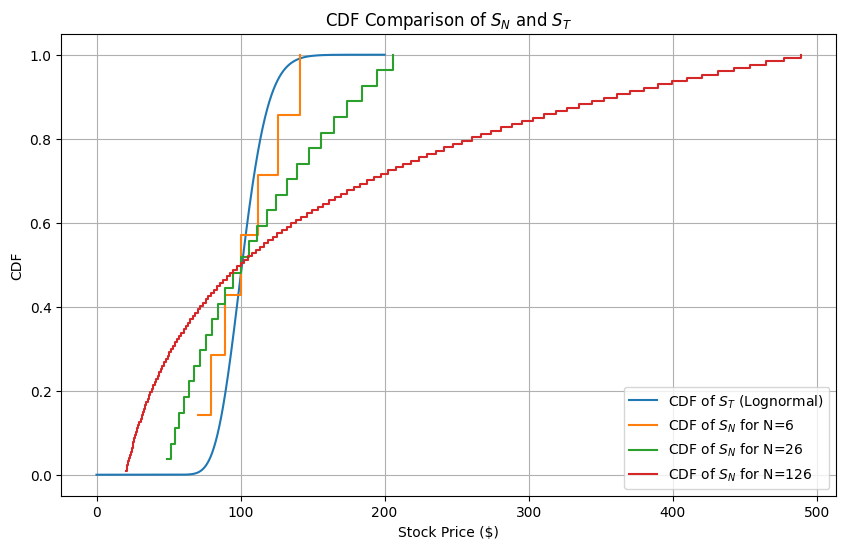

In [33]:
from scipy.stats import lognorm, binom

def simulate_SN(S0: float, K: float, T: float, sigma: float, r: float, N: int) -> np.ndarray:
    """
    Simulate stock prices at maturity using the Cox-Ross-Rubinstein binomial tree model.

    Parameters:
    - S0 (float): Initial stock price.
    - K (float): Strike price of the option.
    - T (float): Time to maturity of the option, in years.
    - sigma (float): Volatility of the underlying asset.
    - r (float): Risk-free interest rate.
    - N (int): Number of steps in the binomial tree.

    Returns:
    - np.ndarray: An array of simulated stock prices at maturity.
    """
    u, d, p = CRR_parameters(sigma, r, T, N)
    stock_prices = S0 * np.array([u**j * d**(N-j) for j in range(N+1)])
    return stock_prices

# Parameters
S0 = 100
K = 90
T = 0.5
sigma = 0.2
r = 0.04
N_values = [6, 26, 126]

# Simulate SN for different values of N.
simulated_prices = {N: simulate_SN(S0, K, T, sigma, r, N) for N in N_values}

# Plot the CDF of ST.
x = np.linspace(0, 200, 1000)
mu = np.log(S0) + (r - 0.5 * sigma**2) * T
sigma_T = sigma * np.sqrt(T)
cdf_ST = lognorm.cdf(x, s=sigma_T, scale=np.exp(mu))

plt.figure(figsize=(10, 6))
plt.plot(x, cdf_ST, label='CDF of $S_T$ (Lognormal)')

# Calculate and plot empirical CDF of SN for different N.
for N, prices in simulated_prices.items():
    sorted_prices = np.sort(prices)
    cdf_SN = np.arange(1, N + 2) / (N + 1)
    plt.step(sorted_prices, cdf_SN, where='post', label=f'CDF of $S_N$ for N={N}')

plt.title('CDF Comparison of $S_N$ and $S_T$')
plt.xlabel('Stock Price ($)')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

##### Analysis of Convergence: $S_N$ to $S_T$

According to the theory, the stock price at the end of a binomial tree model ($S_N$) converges in distribution to the stock price following a geometric Brownian motion ($S_T$) as the number of steps in the binomial model ($N$) approaches infinity. This means that for any value of $s$, the probability that $S_N$ is less than or equal to $s$ approaches the probability that $S_T$ is less than or equal to $s$, i.e., $\mathbb{P}(S_N \leq s) \rightarrow \mathbb{P}(S_T \leq s)$.

##### *Methodology*

To examine this theoretical convergence, we plotted the cumulative distribution functions (CDFs) of $S_N$ for $N = 6, 26, 126$ alongside the CDF of $S_T$. The CDF of $S_T$ was derived from the Black-Scholes model, assuming a lognormal distribution of stock prices at maturity. The CDFs of $S_N$ were empirically calculated using simulated stock prices at maturity from the Cox-Ross-Rubinstein (CRR) binomial tree model.

##### *Observations*

The plots reveal that as $N$ increases, the CDF of $S_N$ more closely approximates the CDF of $S_T$. However, it's noted that the empirical CDFs of $S_N$ exhibit a concave shape, diverging slightly from the smoother ascent of the CDF of $S_T$. This observation stems from the inherent differences between the discrete nature of the CRR model and the continuous process described by the Black-Scholes model.

##### *Analysis*

1. **Discretization vs. Continuous Process**: The CRR model's stepwise approximation introduces granularity not present in the continuous GBM model, leading to the observed concave shapes in the empirical CDFs.

2. **Limitations at Finite $N$**: Despite improvements with larger $N$, the finite discretization cannot fully replicate the continuous nature of GBM, resulting in the distinct shapes of the CDFs.

3. **Convergence in Distribution**: The theoretical convergence of $\mathbb{P}(S_N \leq s)$ to $\mathbb{P}(S_T \leq s)$ is asymptotic. For large but finite $N$, the empirical CDF of $S_N$ closely approximates that of $S_T$, though it may not capture its exact shape due to the discrete versus continuous modeling differences.

4. **Model Assumptions**: Differences in model assumptions and simplifications also contribute to the differences in predicted CDFs, underscoring the importance of model limitations in interpretation.

##### *Conclusion*

Our results align with the theory that $S_N$ converges in distribution to $S_T$ as $N \rightarrow \infty$. The observed differences in the shapes of their CDFs at finite $N$ reflect the limitations and inherent differences between discrete and continuous models. This analysis underscores the importance of considering these factors when applying these models to real-world scenarios.

#### Problem #3

a. Explain in simple terms the concept of exercise boundary in American option pricing.

##### Exercise Boundary in American Option Pricing

In American option pricing, an important concept is the **exercise boundary**. This refers to the decision rule that determines whether it is more beneficial to exercise the option immediately or to hold it for potential future gain. Unlike European options, which can *only be exercised at maturity*, American options can be exercised at **any point before or at the expiration date**. The exercise boundary is essentially the threshold that separates the region where exercising the option is optimal from the region where holding the option is preferred.

##### *Key Points*:

- **Early Exercise**: For American options, the possibility of early exercise (before expiration) introduces the need to identify when it is advantageous to do so. This decision is influenced by factors such as the underlying asset's price, time to expiration, interest rates, and dividends.

- **Call Options**: For American call options on non-dividend-paying stocks, it's generally never optimal to exercise early due to the time value of money. However, for dividend-paying stocks, early exercise might be optimal just before a dividend payment if the dividend is expected to reduce the stock's price significantly.

- **Put Options**: For American put options, early exercise can be optimal when the underlying asset's price falls significantly. This is because exercising the put option allows the holder to sell the underlying asset at the strike price, which may be higher than the current market price.

##### *Visualizing the Exercise Boundary*:

The exercise boundary can be visualized on a graph with the underlying asset's price on the x-axis and the option's payoff or profit on the y-axis. The boundary delineates areas where the option's intrinsic value (the immediate exercise value) exceeds its extrinsic value (the value of holding the option). 

In practical terms, the exercise boundary helps traders and investors make strategic decisions about exercising American options by evaluating the trade-off between immediate exercise and the potential for greater future benefits.

b. Extend your code in Problem 1 to handle American options and consider a put option with $K = 100$, $T = 5$, and $r = 0.04$. For each of the volatility levels $\sigma \in [0.10, 0.30, 0.50]$, visualize the exercise boundary of the put option using a binomial tree with $N = 500$ steps.

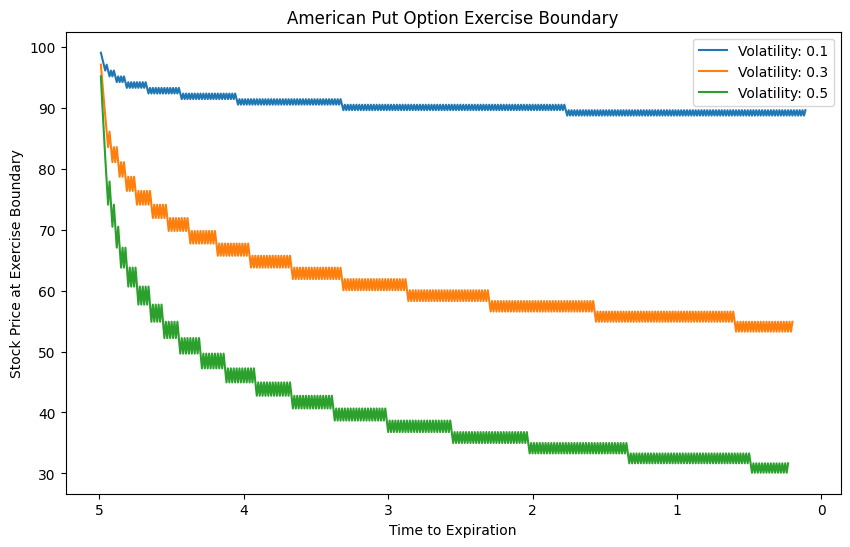

In [34]:
def american_option_binomial_tree(S0: float, K: float, T: float, sigma: float, r: float, N: int, option_type: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calculate the price of an American option using the Cox-Ross-Rubinstein binomial tree and visualize the exercise boundary.

    Parameters:
    - S0: Initial stock price.
    - K: Strike price.
    - T: Time to maturity.
    - sigma: Volatility of the underlying asset.
    - r: Risk-free interest rate.
    - N: Number of time steps.
    - option_type: Type of the option ('call' or 'put').

    Returns:
    - A tuple containing the stock prices and corresponding optimal exercise times for the put option.
    """
    dt = T / N
    u, d, p = CRR_parameters(sigma, r, T, N)
    discount = np.exp(-r * dt)
    
    # Initialize stock price and option value trees.
    stock_prices = np.zeros((N+1, N+1))
    option_values = np.zeros_like(stock_prices)
    
    # Populate stock prices at maturity.
    for i in range(N+1):
        for j in range(i+1):
            stock_prices[j, i] = S0 * (u**j) * (d**(i-j))
            
    # Calculate option values at maturity.
    if option_type == 'put':
        option_values[:, N] = np.maximum(K - stock_prices[:, N], 0)
    
    # Backward induction for option value and early exercise.
    early_exercise_boundary = np.zeros(N+1)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            hold_value = discount * (p * option_values[j+1, i+1] + (1-p) * option_values[j, i+1])
            exercise_value = K - stock_prices[j, i] if option_type == 'put' else 0
            option_values[j, i] = max(hold_value, exercise_value)
            if option_values[j, i] == exercise_value and exercise_value > 0:
                early_exercise_boundary[i] = stock_prices[j, i]
    
    # Filter out zeros from the exercise boundary.
    valid_times = np.linspace(0, T, N+1)[early_exercise_boundary > 0]
    valid_prices = early_exercise_boundary[early_exercise_boundary > 0]
    
    return valid_prices, valid_times

# Parameters for the American put option
S0 = 100
K = 100
T = 5
r = 0.04
N = 500
sigma_levels = [0.10, 0.30, 0.50]

# Plotting the exercise boundary for different volatility levels.
plt.figure(figsize=(10, 6))

for sigma in sigma_levels:
    prices, times = american_option_binomial_tree(S0, K, T, sigma, r, N, 'put')
    plt.plot(times, prices, label=f'Volatility: {sigma}')

plt.title('American Put Option Exercise Boundary')
plt.xlabel('Time to Expiration')
plt.ylabel('Stock Price at Exercise Boundary')
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis to show time to expiration decreasing
plt.show()

c. How does the exercise boundary depend on the volatility $\sigma$? Explain intuitively in financial terms.

##### Dependence of Exercise Boundary on Volatility

The exercise boundary of an American put option is significantly influenced by the volatility, $\sigma$, of the underlying asset. Volatility is a measure of how much the asset's price fluctuates over time. Intuitively, in financial terms, the relationship between the exercise boundary and volatility can be understood as follows:

##### *Higher Volatility ($\sigma$)*

- **Increased Uncertainty**: Higher volatility implies greater uncertainty about the future price of the underlying asset. With more uncertainty, there is a higher chance that the stock price could decline significantly, which increases the potential payoff from holding the option rather than exercising it early.
- **Option Value**: The value of the optionality—the choice to exercise the put option—increases with volatility. This is because the option provides insurance against downside risk, and like any insurance, it becomes more valuable as the risk it protects against becomes more pronounced.
- **Exercise Boundary Lower**: As a result, the exercise boundary—the stock price at which it's optimal to exercise the option early—tends to be lower when volatility is higher. Investors are willing to wait longer (for a potentially lower stock price) before exercising the option, as the increased volatility could lead to more favorable exercise conditions in the future.

##### *Lower Volatility ($sigma$)*

- **Reduced Uncertainty**: Lower volatility indicates less uncertainty and smaller price fluctuations. The likelihood of the stock price falling dramatically is reduced, which diminishes the potential benefit of waiting to exercise.
- **Option Value**: The value of holding the option is less when volatility is low because the protective value of the option against sharp declines is less needed.
- **Exercise Boundary Higher**: Thus, the exercise boundary is higher in a low volatility environment. Investors are more inclined to exercise the option at a relatively higher stock price because there is less chance of missing out on more advantageous exercise prices later.

##### *Conclusion*

In essence, the exercise boundary's dependence on volatility reflects the trade-off between immediate exercise and the value of waiting when considering the likelihood of favorable movements in the underlying asset's price. High volatility increases the value of waiting due to the greater chance of beneficial price movements, while low volatility favors earlier exercise to capture the intrinsic value.

d. A **callable option** is such that the issuer has the right to buy it back at any time at a predetermined *call price*. Upon issuer call, the option holder can choose to either exercise the option or receive the call price.

Write the dynamic programming equation for a callable American put option with strike price $K$ and call price $H$. Explain in words the meaning of each term in your equation. (Extra Credit)

##### Dynamic Programming Equation for a Callable American Put Option

The dynamic programming equation for a callable American put option with strike price $K$ and call price $H$ involves extending the standard American put option pricing to include the possibility of the option being called by the issuer. At each step, we must consider the optimal action, which could be one of the following:

1. **Exercise the Put Option**: If the stock price is below the strike price $K$, the holder can exercise the option and sell the stock at price $K$, receiving $K - S$, where $S$ is the current stock price.
2. **Hold the Option**: If the stock price is above the strike price, the holder can choose not to exercise the option, in which case the option value is the discounted expectation of future values.
3. **Option Called by Issuer**: If the issuer calls the option, the holder can choose to either exercise the option (if it's in-the-money) or receive the call price $H$.

The dynamic programming equation considering these possibilities at each node $i$ and stock price $S_i$ is:

$$
V_i(S_i) = \max\{\max(K - S_i, 0), e^{-r \Delta t} [p V_{i+1}(u S_i) + (1-p) V_{i+1}(d S_i)], H \}
$$

where:
- $V_i(S_i)$ is the value of the option at node $i$ and stock price $S_i$.
- $K - S_i$ is the intrinsic value if the option is exercised.
- $e^{-r \Delta t} [p V_{i+1}(u S_i) + (1-p) V_{i+1}(d S_i)]$ is the expected value of holding the option, discounted back to the present value.
- $H$ is the call price, which is the value the holder receives if the issuer calls the option.
- $p$ is the risk-neutral probability of a price increase, $u$ is the up-factor, $d$ is the down-factor, and $r$ is the risk-free interest rate.

The equation reflects the maximum value at each step, considering the three choices available to the holder, thus capturing the essence of pricing a callable American put option.

In [39]:
def callable_american_put_option(S0: float, K: float, H: float, T: float, sigma: float, r: float, N: int) -> float:
    """
    Calculate the price of a callable American put option using the Cox-Ross-Rubinstein binomial tree.

    Parameters:
    - S0: Initial stock price.
    - K: Strike price of the put option.
    - H: Call price of the option.
    - T: Time to maturity.
    - sigma: Volatility of the underlying asset.
    - r: Risk-free interest rate.
    - N: Number of steps in the binomial tree.

    Returns:
    - The price of the callable American put option.
    """
    dt = T / N  # Time step
    u, d, p = CRR_parameters(sigma, r, T, N)
    discount = np.exp(-r * dt)
    
    # Initialize the stock price and option value trees.
    stock_prices = S0 * d**np.arange(N, -1, -1) * u**np.arange(0, N+1)
    option_values = np.maximum(K - stock_prices, 0)
    
    # Backward induction through the tree
    for i in range(N-1, -1, -1):
        stock_prices = stock_prices[1:] * d / u
        hold_values = discount * (p * option_values[:-1] + (1 - p) * option_values[1:])
        exercise_values = K - stock_prices
        # Decision at each node: exercise, hold, or take the call price if the option is called
        option_values = np.maximum.reduce([exercise_values, hold_values, np.full_like(hold_values, H)])
    
    return option_values[0]

#### Problem #4

a. Write the payoff function of a down-and-in barrier call option with barrier $H$ and the strike price $K$.

##### Payoff Function of a Down-and-In Barrier Call Option

A **down-and-in barrier call option** is a type of path-dependent option whose existence (activation) depends on the underlying asset's price hitting a certain barrier level $H$. This option becomes active or "knocks in" only if the asset's price falls below the barrier \(H\) at any time during the option's life. If the barrier is not breached, the option expires worthless, regardless of the asset's final price relative to the strike price \(K\).

The payoff function $P(S_T)$ of a down-and-in barrier call option at maturity $T$ can be written as:

$$
P(S_T) = 
\begin{cases} 
(S_T - K)^+ & \text{if } \min_{0 \leq t \leq T} S_t \leq H \\
0 & \text{otherwise}
\end{cases}
$$

where:
- $S_T$ is the asset price at maturity.
- $K$ is the strike price of the call option.
- $H$ is the barrier level.
- $t$ represents any point in time between $0$ and $T$, the life of the option.
- $(S_T - K)^+$ denotes the standard call option payoff and is defined as $\max(S_T - K, 0)$.

Intuitively, the payoff function states that if the asset price never drops to or below the barrier level $H$ throughout the option's life, the option will not be exercised and the payoff will be zero. However, if the asset price does hit or fall below $H$, the option "**knocks in**", and its payoff will be the same as a standard call option's payoff, which is the excess of the asset's price over the strike price $K$ if it's positive, and zero otherwise.

In [38]:
from typing import List

def down_in_call_payoff(S_T: float, K: float, H: float, S: List[float]) -> float:
    """
    Calculate the payoff of a down-and-in barrier call option.

    Parameters:
    - S_T : float
        The stock price at maturity.
    - K : float
        The strike price of the option.
    - H : float
        The barrier level.
    - S : List[float]
        A list or array of stock prices over the life of the option.

    Returns:
    - The payoff of the option: float
        The payoff is max(S_T - K, 0) if the barrier has been breached;
        otherwise, it is 0.
    """
    # Check if the barrier has been breached during the option's life.
    barrier_breached = any(price <= H for price in S)
    
    # Calculate the payoff if the barrier has been breached.
    if barrier_breached:
        return max(S_T - K, 0)
    else:
        return 0

# TEST CASE:
# Barrier is 95, strike is 100, spot at maturity is 102,
    
stock_prices = [110, 108, 107, 99, 94, 96, 104]  # E.g., stock prices

payoff = down_in_call_payoff(S_T = 102, K = 100, H = 95, S = stock_prices)

print(f"The payoff of the down-and-in barrier call option is: {payoff}")

The payoff of the down-and-in barrier call option is: 2


b. Assume that $H < S_0 < K$. What needs to happen for the payoff of the barrier option to be positive?

##### Conditions for a Positive Payoff in a Down-and-In Barrier Call Option

Given the initial conditions where the barrier $H$ is less than the initial stock price $S_0$, which in turn is less than the strike price $K$ ($H < S_0 < K$), specific events must occur for the down-and-in barrier call option to have a **positive payoff**.

For the payoff of the barrier option to be positive at maturity $T$, the following sequence of events needs to happen:

1. **Barrier Breach**: The price of the underlying asset must decrease to hit or fall below the barrier level $H$ at some point during the option's life. This event activates the option ('knocks it in'). If this condition is not met, the option will expire worthless.

2. **Price Rebound Above Strike**: After the barrier has been breached, the price of the underlying asset must subsequently increase and be above the strike price $K$ at the time of maturity ($S_T > K$). This is because the payoff of the option is given by $(S_T - K)^+$, which is positive only if $S_T > K$.

In summary, for the down-and-in barrier call option to have a positive payoff, the asset's price must dip below the barrier $H$ and then recover to above the strike price $K$ by the expiration date. This path dependency is what differentiates barrier options from standard options and adds complexity to their valuation.

c. Write the dynamic programming equation for the value of the barrier option. Explain in words the meaning of each term in your equation.

##### Dynamic Programming Equation for a Down-and-In Barrier Call Option

The value of a down-and-in barrier call option can be determined using a *dynamic programming approach* in a binomial tree framework. The dynamic programming equation for the option value at each node is given by:

$$
V_{i,j} = 
\begin{cases} 
e^{-r \Delta t} \left( p V_{i+1,j+1} + (1-p) V_{i+1,j} \right) & \text{if } S_{i,j} > H \\
\max(S_{i,j} - K, 0) & \text{if } S_{i,j} \leq H \text{ and barrier is hit} \\
0 & \text{otherwise}
\end{cases}
$$

where:
- $V_{i,j}$ is the value of the option at node $(i, j)$.
- $S_{i,j}$ is the underlying asset price at node $(i, j)$.
- $r$ is the risk-free interest rate.
- $\Delta t$ is the time step size.
- $p$ is the risk-neutral probability of an upward move in the asset price.
- $e^{-r \Delta t}$ is the discount factor for one time step.
- $K$ is the strike price of the option.
- $H$ is the barrier level.

The equation takes into account that the option is only valuable if the barrier has been hit at least once during the option's life. If the barrier has not been hit, the option value is zero. If the barrier has been hit and the asset price is above the barrier, we continue to evolve the option value based on the expected value at the next time step, discounted back to the present. If the asset price is below the barrier, the option has been activated, and we take the maximum of exercising the option or continuing to hold it.

d. When pricing barrier options using binomial trees, do you expect the convergence to be faster or slower than when pricing regular (non-barrier) options? That is, do you think a smaller or larger number of steps is required to attain a comparable level of accuracy? Explain your reasoning.